<a href="https://colab.research.google.com/github/fares-mldev/uns-ml2021/blob/main/tp4/ML_TP4_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

In [37]:
#@title General settingss

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Requirements
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=cb6d77f4cdde2a8580971735979798cc633e0b4850e5fe2d350bc9cb95212539
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
#@title Download data

# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)


--2021-10-15 19:20:15--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip’

data_1.zip          100%[===================>]  30.59M   154MB/s    in 0.2s    

2021-10-15 19:20:17 (154 MB/s) - ‘dataroot/data_1.zip’ saved [32074743/32074743]

--2021-10-15 19:20:17--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [3]:
#@title Load data

# Load sign names
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
class_names = pd.Series(df.SignName.values,index=df.ClassId).to_dict()

# Load images
import pickle

data = {}

data['train'] = pickle.load( open( dataroot+"train.p", "rb" ) )
print("train data loaded...")
data['val'] = pickle.load( open( dataroot+"valid.p", "rb" ) )
print("validation data loaded...")
data['test'] = pickle.load( open( dataroot+"test.p", "rb" ) )
print("test data loaded...")


train data loaded...
validation data loaded...
test data loaded...


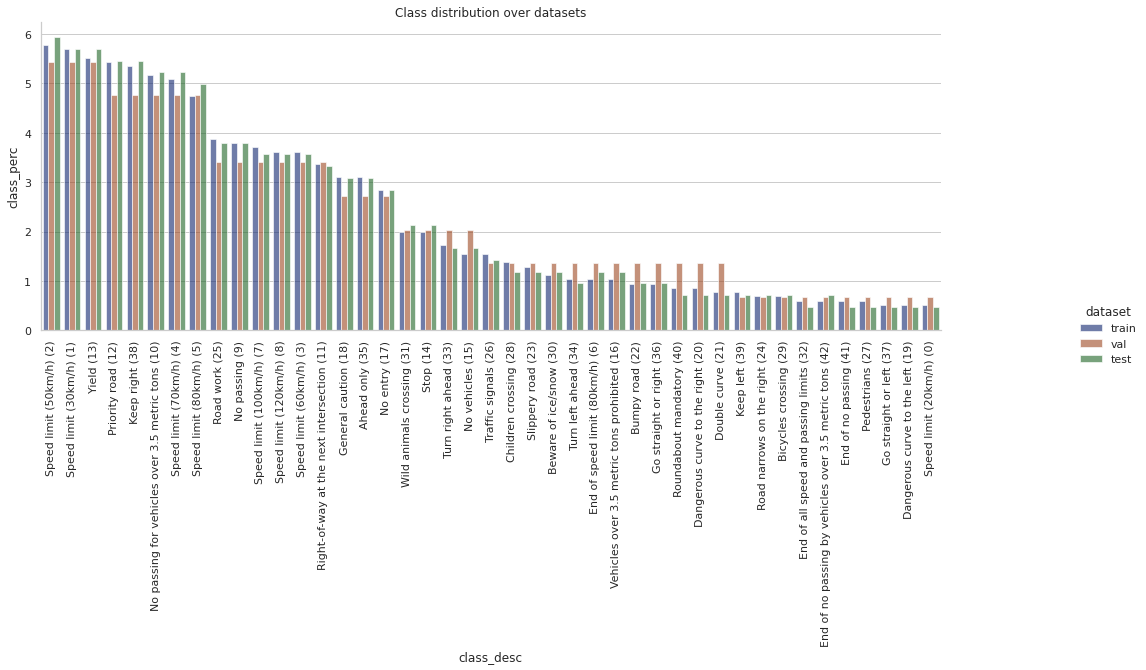

In [6]:
#@title Look for class distribution
#@markdown There is a data distribution skew. 
#@markdown The majority classes have up to 10x more representation than minority classes.
#@markdown The skew is consistent over different datasets.

import matplotlib.pyplot as plt

def class_distribution(data):

  # Build a dataframe
  # dataset | class_id | class_name             | class_count
  # 'train' | 0        | 'Speed limit (20km/h)' | 2034
  #   ...   |
  # 'test'  | 0        | 'Speed limit (20km/h)' | 345
  #   ...   |
  # 'val'   | 0        | 'Speed limit (20km/h)' | 654

  record_list = []

  # Loop over datasets
  for dataset in data:
    # Get class counts
    df_labels = pd.DataFrame(data[dataset], columns= ['labels'])
    class_counts = df_labels['labels'].value_counts()
    
    for class_id, class_count in class_counts.items():
      
      # Get class name
      class_name = class_names[class_id]

      # Build a dict for each record the following keys:
      record = {'dataset': dataset, 
                'class_id': class_id,
                'class_name': class_name,
                'class_count': class_count}

      # Append to list
      record_list.append(record)

  df_datadist = pd.DataFrame(record_list)

  # Add total count for each dataset
  df_total_counts = df_datadist.groupby('dataset').sum()['class_count']
  df_total_counts.name = 'total_count'
  df_datadist = df_datadist.join(df_total_counts,on='dataset')

  # Add percentage of class in each database 
  def calc_perc(x):
      return 100 * x['class_count'] / x['total_count'] 

  df_datadist['class_perc'] = df_datadist.apply(calc_perc, axis=1)

  # Add description
  def concat(x):
      return x['class_name'] + ' (' + str(x['class_id']) + ')'

  df_datadist['class_desc'] = df_datadist.apply(concat, axis=1)    

  return df_datadist


# Draw a nested barplot by species and sex
import seaborn as sns
sns.set_theme(style="whitegrid")

df_datadist = class_distribution(data)

# Plot data distribution percentages
g = sns.catplot(
    data=df_datadist, kind="bar",
    x="class_desc", y="class_perc", hue="dataset",
    ci="dataset", palette="dark", alpha=.6, height=6,
)

fig = plt.gcf()
fig.set_size_inches(20,5)
ax = plt.gca()
ax.set_title('Class distribution over datasets')
g.set_xticklabels(rotation=90)


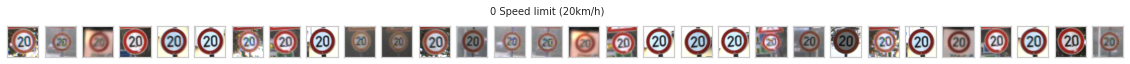

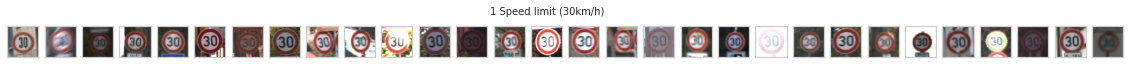

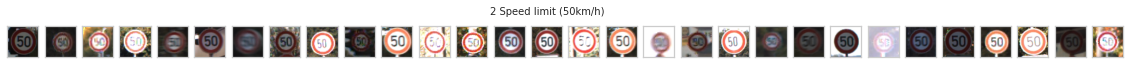

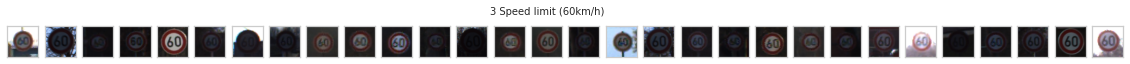

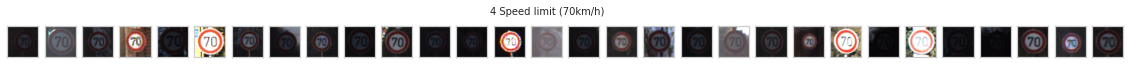

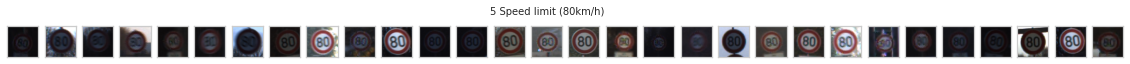

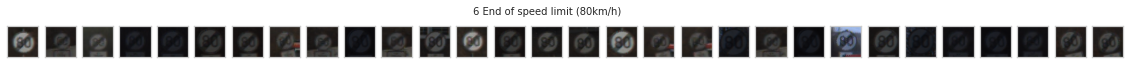

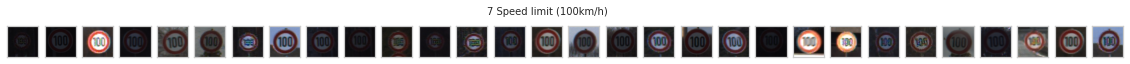

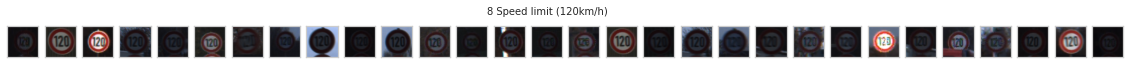

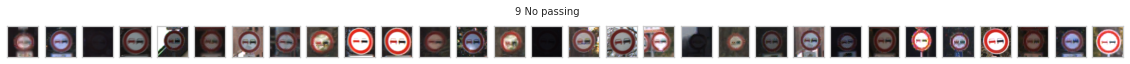

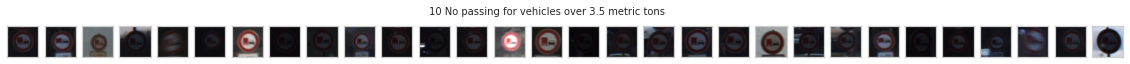

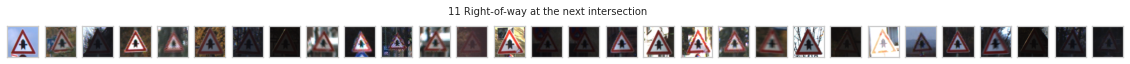

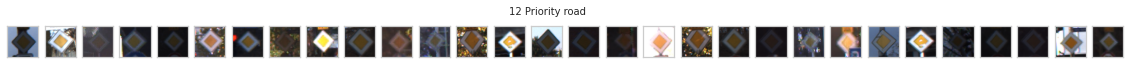

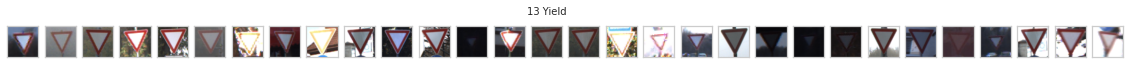

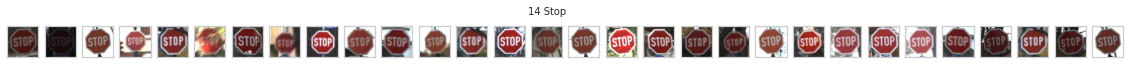

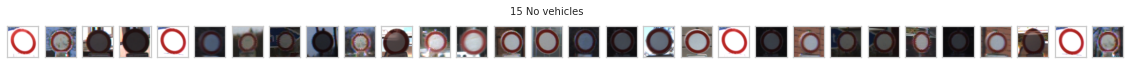

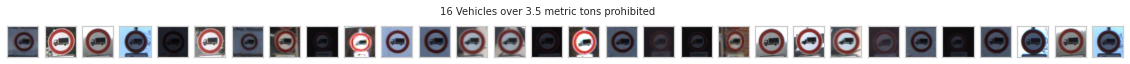

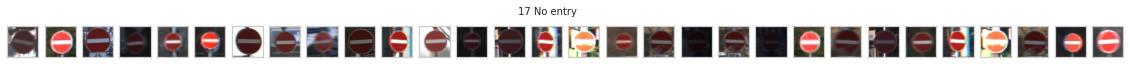

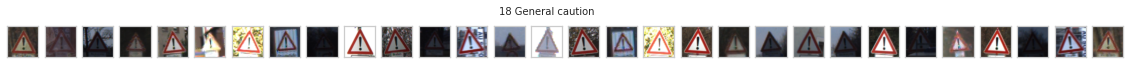

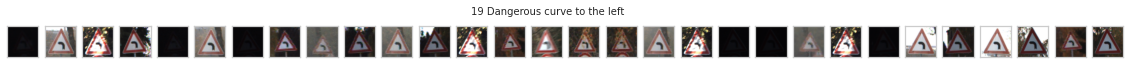

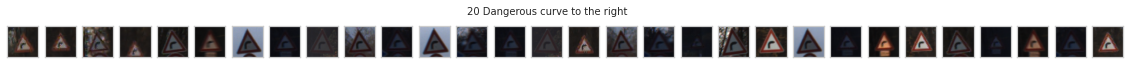

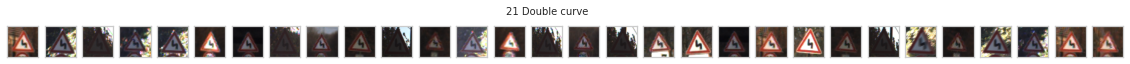

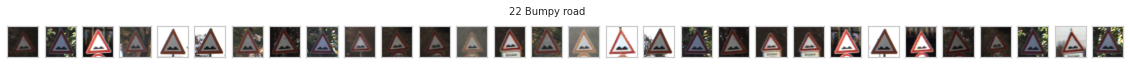

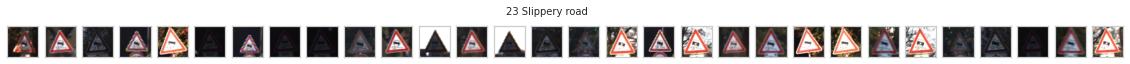

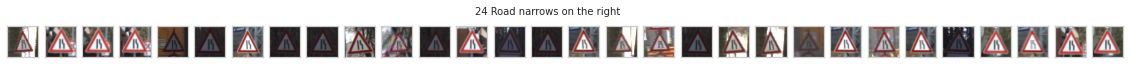

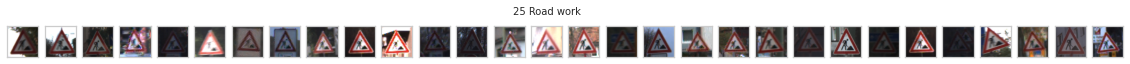

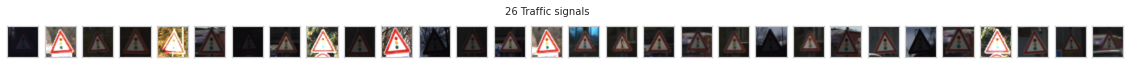

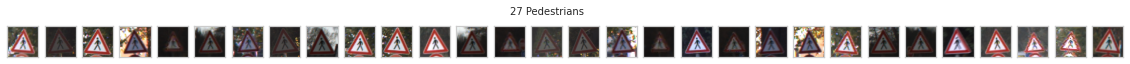

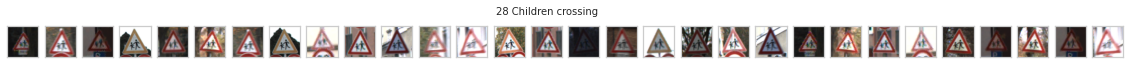

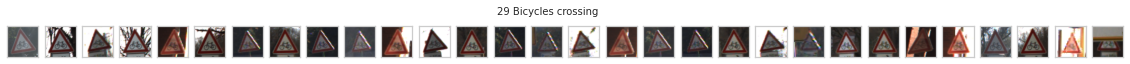

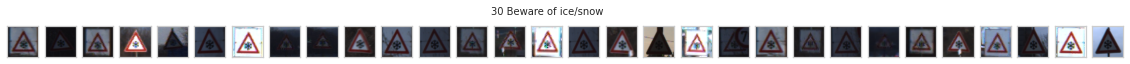

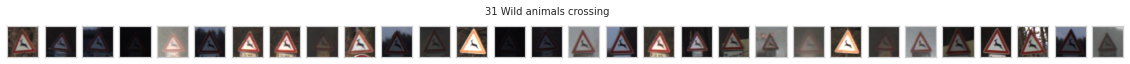

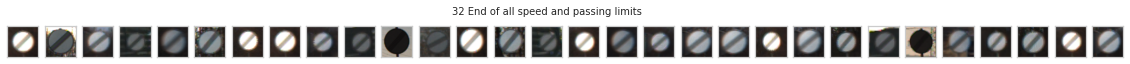

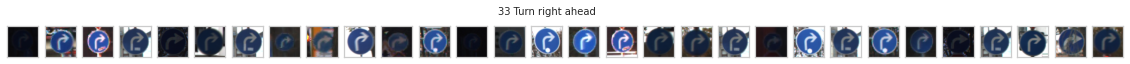

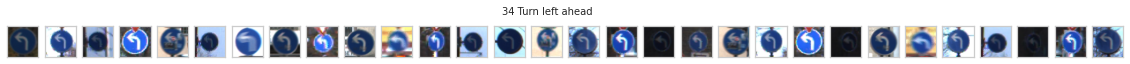

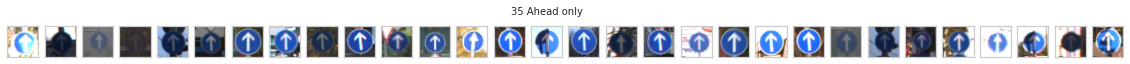

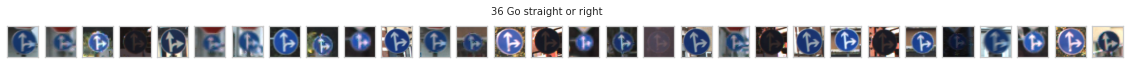

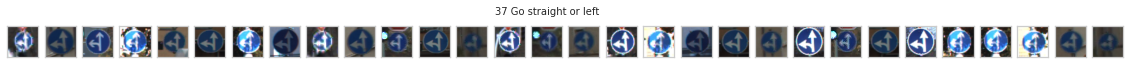

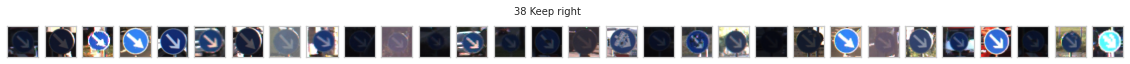

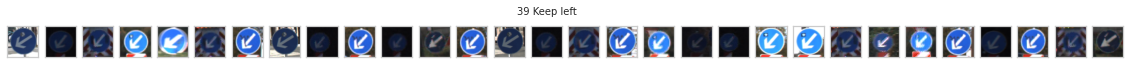

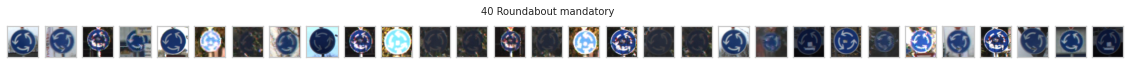

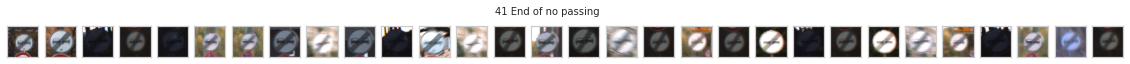

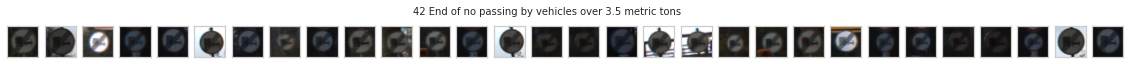

In [7]:
#@title Visualize classes
#@markdown Lets check out 20 random samples of each class. There are several light and focus conditions.
#@markdown Some classes also are very similar, so we can expect the algorithm to confuse between them.

# Matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

def plot_examples(data,n_samples):
  '''
  Plot n_examples examples from each  
  '''

  # Shuffle data 
  df_labels = pd.DataFrame(data, columns= ['labels']).sample(frac=1)
  df_labels

  for label in class_names:
    
    # Select 20 samples from label
    df = df_labels.loc[df_labels['labels']==label].head(n_samples)

    n = len(df)
    fig, axes = plt.subplots(1,n)
    fig.set_size_inches(20,1)
    fig.suptitle(str(label) + ' ' + class_names[label], fontsize=10)

    # Iterate every sample
    for idx, x in enumerate(df.iterrows()):
      id, row = x
      im = data['features'][id,:,:,:]
      axes[idx].imshow(im)
      axes[idx].axes.xaxis.set_visible(False)
      axes[idx].axes.yaxis.set_visible(False)

plot_examples(data['train'],30)

In [29]:
#@title Fix class imbalance
#@markdown To fix the data imbalance, we perform undersampling on the majority classes.

#!pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler

def undersample(X,y, strategy='not minority'):

  us = RandomUnderSampler(sampling_strategy=strategy)

  # Get subsampled indexes
  idx_us, y_us = us.fit_resample(np.array(range(len(y))).reshape(-1,1),y)

  # Slice features
  X_us=X[idx_us,:,:][:,0,:,:]

  return X_us, y_us

# Define train set
X = data['train']['features']
y = data['train']['labels']

# Undersample
X_train, y_train = undersample(X,y)

# Check class imbalance
df_labels = pd.DataFrame(y_train, columns= ['labels'])
class_counts = df_labels['labels'].value_counts()


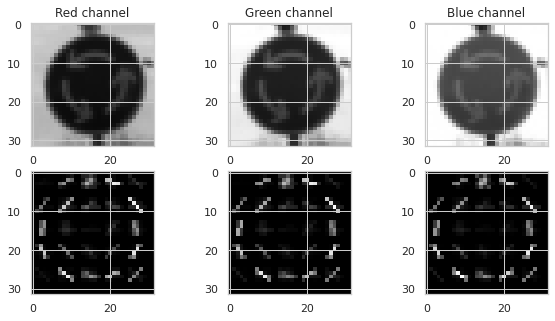

In [43]:
#@title Feature Engineering { run: "auto" }

#@markdown We won't be feeding the images directly to the classifier. Instead we will perform a previous feature extraction as suggested in this paper. https://www.researchgate.net/publication/300918031_Hierarchical_Traffic_Sign_Recognition_Based_on_Multi-feature_and_Multi-classifier_Fusion

#@markdown The histogram of oriented gradients (HOG) is a feature descriptor commonly used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image

#@markdown As a result, an image can be represented as a linear feacture vector containing spatial information of each channel. 

#@markdown Number of orientations to be detected
orient = 7 #@param {type:"slider", min:5, max:9, step:2}

#@markdown Pixels per cell
ppc = 6 #@param {type:"slider", min:4, max:8, step:2}

#@markdown Cells per block (for normalization)
cpb = 4 #@param {type:"slider", min:3, max:5, step:1}

import numpy as np
from skimage.io import imread
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

#Avoid warnings 
plt.rcParams.update({'figure.max_open_warning': 0})

#im_rgb = exposure.equalize_hist(signimages['features'][30073])

im = data['train']['features'][4439]

im_r = np.stack([im[:,:,0], im[:,:,0], im[:,:,0]], axis= 2)
im_g = np.stack([im[:,:,1], im[:,:,1], im[:,:,1]], axis= 2)
im_b = np.stack([im[:,:,2], im[:,:,2], im[:,:,2]], axis= 2)


feat_r, hog_image_r = hog(im[:,:,0], orientations=orient, pixels_per_cell=(ppc , ppc),
                	cells_per_block=(cpb, cpb), visualize=True, multichannel=False,feature_vector=True)


feat_g, hog_image_g = hog(im[:,:,1], orientations=orient, pixels_per_cell=(ppc , ppc),
                	cells_per_block=(cpb, cpb), visualize=True, multichannel=False,feature_vector=True)


feat_b, hog_image_b = hog(im[:,:,2], orientations=orient, pixels_per_cell=(ppc , ppc),
                	cells_per_block=(cpb, cpb), visualize=True, multichannel=False,feature_vector=True)

feat, hog_image = hog(im, orientations=orient, pixels_per_cell=(ppc , ppc),
                	cells_per_block=(cpb, cpb), visualize=True, multichannel=True,feature_vector=True)


fig, axes = plt.subplots(2,3)
fig.set_size_inches(10,5)

axes[0,0].imshow(im_r, cmap="gray")
axes[0,0].set_title('Red channel')
axes[0,1].imshow(im_g, cmap="gray")
axes[0,1].set_title('Green channel')
axes[0,2].imshow(im_b, cmap="gray")
axes[0,2].set_title('Blue channel')

axes[1,0].imshow(hog_image_r, cmap="gray")
axes[1,1].imshow(hog_image_g, cmap="gray")
axes[1,2].imshow(hog_image_b, cmap="gray")


In [31]:
#@title Define HOG transformer
#@markdown We defina a HOG transformer class to be added to the model pipeline.


from sklearn.base import BaseEstimator, TransformerMixin

class HOGTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, orientations = 5, pixels_per_cell = 4, cells_per_block = 3 ):
      self.orientations = orientations 
      self.pixels_per_cell = pixels_per_cell
      self.cells_per_block = cells_per_block 


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

      # Initialize return vector  
      X_ret = []

      # Iterate over samples and apply hog transform
      for x in X:
        feat= hog(x, 
                  orientations=self.orientations, 
                  pixels_per_cell=(self.pixels_per_cell , self.pixels_per_cell),
                  cells_per_block=(self.cells_per_block, self.cells_per_block), 
                  visualize=False, 
                  multichannel=True,
                  feature_vector=True)
          
        X_ret.append(feat)

      return np.array(X_ret)

In [34]:
#@title Define model and train it

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

# Define pipeline elements
hogt = HOGTransformer()
svc = SVC(kernel='linear', C=1, decision_function_shape='ovo')

# Build pipeline
clf = Pipeline(steps=[('hogt', hogt),
                      ('svc', svc)])

# Define tunable parameters
params = [{'hogt__orientations': [7],
           'hogt__pixels_per_cell': [4],
           'svc__C':[1],
           'svc__kernel':['linear']
          }]

# Define Metrics
scoring = ['accuracy','f1_micro']

# Grid search
gs = GridSearchCV(clf,
                  param_grid=params,
                  scoring=scoring,
                  refit='f1_micro',
                  cv=5, 
                  return_train_score=True,
                  verbose=4)

# Fit grid search
gs.fit(X_train,y_train)

# save model
import pickle
filename = 'trained_models.sav'
pickle.dump(gs, open(filename, 'wb'))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear, accuracy=(train=1.000, test=0.957), f1_micro=(train=1.000, test=0.957), total= 1.0min
[CV] hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV]  hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear, accuracy=(train=1.000, test=0.966), f1_micro=(train=1.000, test=0.966), total= 1.0min
[CV] hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.7min remaining:    0.0s


[CV]  hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear, accuracy=(train=1.000, test=0.959), f1_micro=(train=1.000, test=0.959), total= 1.0min
[CV] hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.0min remaining:    0.0s


[CV]  hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear, accuracy=(train=1.000, test=0.960), f1_micro=(train=1.000, test=0.960), total= 1.0min
[CV] hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear 
[CV]  hogt__orientations=7, hogt__pixels_per_cell=4, svc__C=1, svc__kernel=linear, accuracy=(train=1.000, test=0.961), f1_micro=(train=1.000, test=0.961), total= 1.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('hogt',
                                        HOGTransformer(cells_per_block=3,
                                                       orientations=5,
                                                       pixels_per_cell=4)),
                                       ('svc',
                                        SVC(C=1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovo',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                          

In [47]:
#@title Best trained model 

# retrieve models
import wget
url = 'https://raw.githubusercontent.com/fares-mldev/uns-ml2021/main/tp4/model/trained_models.sav'
filename = wget.download(url)

import pickle
gs = pickle.load(open(filename, 'rb'))

# Get best model
clf = gs.best_estimator_
clf

Pipeline(memory=None,
         steps=[('hogt',
                 HOGTransformer(cells_per_block=3, orientations=7,
                                pixels_per_cell=4)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [48]:
#@title Compare training results { run: "auto" }
# Convert results to dataframe for analisys
df_results = pd.DataFrame.from_dict(gs.cv_results_, orient='columns')
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hogt__orientations,param_hogt__pixels_per_cell,param_svc__C,param_svc__kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_train_f1_micro,split1_train_f1_micro,split2_train_f1_micro,split3_train_f1_micro,split4_train_f1_micro,mean_train_f1_micro,std_train_f1_micro
0,42.571499,0.078537,19.465369,0.075676,7,4,1,linear,"{'hogt__orientations': 7, 'hogt__pixels_per_ce...",0.957364,0.966408,0.959302,0.959948,0.960594,0.960724,0.003041,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.957364,0.966408,0.959302,0.959948,0.960594,0.960724,0.003041,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [49]:
#@title Validate model { run: "auto" }

X_test, y_true = undersample(data['val']['features'],
                             data['val']['labels'])

y_pred=clf.predict(X_test)

from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def calc_metrics(y_true, y_pred) -> dict:
  '''
  Evaluate metrics and return them in a dictionary
  '''
  metrics = {}
  metrics['accuracy']=accuracy_score(y_true,y_pred)
  metrics['f1_score']=f1_score(y_true,y_pred, average ='micro')
  metrics['precision']=precision_score(y_true,y_pred, average ='micro')
  metrics['recall']=recall_score(y_true,y_pred, average ='micro')

  return metrics

calc_metrics(y_true, y_pred)

{'accuracy': 0.9062015503875969,
 'f1_score': 0.9062015503875969,
 'precision': 0.9062015503875969,
 'recall': 0.9062015503875969}

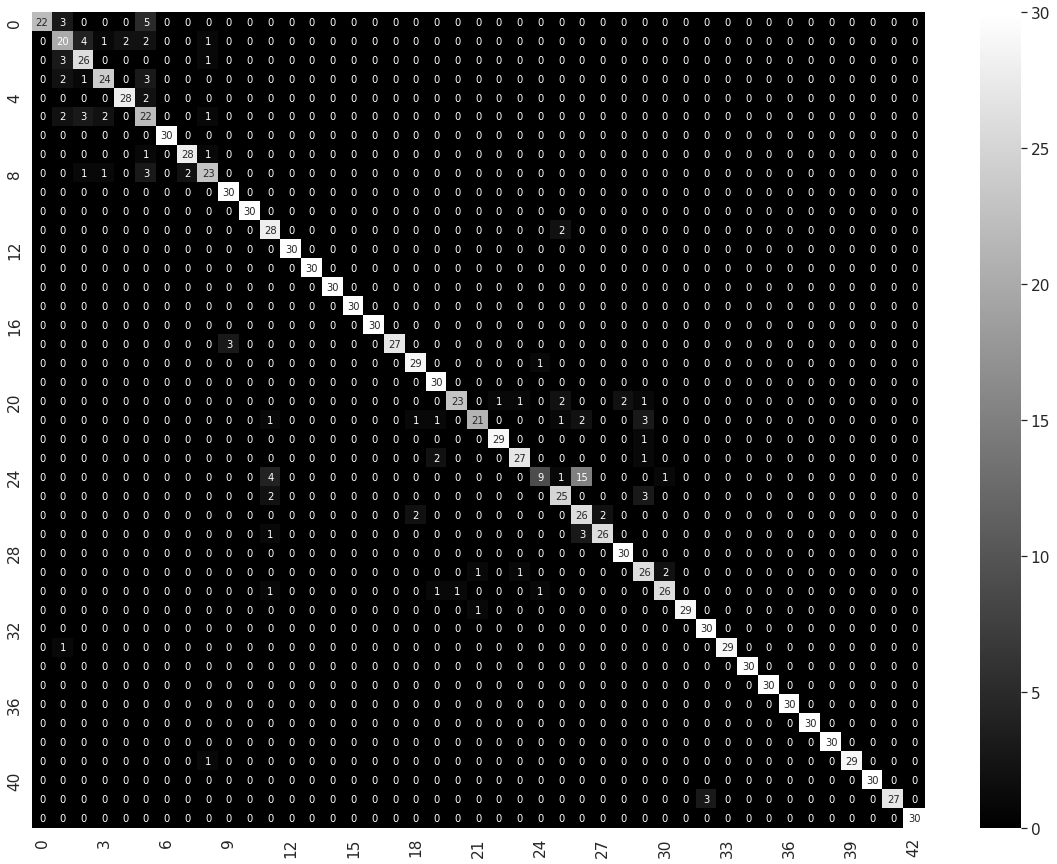

In [50]:
#@title Confusion matrix { run: "auto" }

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm =  confusion_matrix(y_true, 
                       y_pred,
                       #normalize='true'
                       )
import seaborn as sn

df_cm = pd.DataFrame(cm)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap= 'gray') # font size
fig = plt.gcf()
fig.set_size_inches(20,15)

In [51]:
#@title Error Analysis { run: "auto" }
from sklearn.metrics import classification_report

#@markdown See 10 worst performant classes
cr = classification_report(y_true, y_pred, output_dict = True)
ls_cr = [cr[str(class_id)] for class_id in class_names]
df_cr = pd.DataFrame.from_dict(ls_cr).sort_values(by='f1-score')
df_cr.head(10)

,precision,recall,f1-score,support
24,0.818182,0.300000,0.439024,30
5,0.578947,0.733333,0.647059,30
1,0.645161,0.666667,0.655738,30
26,0.565217,0.866667,0.684211,30
21,0.913043,0.700000,0.792453,30
8,0.821429,0.766667,0.793103,30
2,0.742857,0.866667,0.800000,30
29,0.742857,0.866667,0.800000,30
25,0.806452,0.833333,0.819672,30
3,0.857143,0.800000,0.827586,30
